# **Sleep** **Analysis😴**

# Define project purpose

In [1]:
# The goal is to analyze sleep health data
# and classify sleep quality using ML models.


# Import main libraries

In [2]:
import pandas as pd
import numpy as np


# Import visualization and ML libraries

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Read the dataset

In [4]:
# Read CSV file
df = pd.read_csv("expanded_sleep_health_dataset.csv")


# **Dataset overview**

# Check the shape of the dataset

In [5]:
print("Shape:", df.shape)


Shape: (1500, 13)


# Display column names

In [6]:
print("Columns:", df.columns.tolist())

Columns: ['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']


# Preview the first few rows

In [7]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,41,Nurse,7.0,5,91,10,Normal,111/71.15,56,9476,NaN
1,2,Male,42,Software Engineer,6.7,7,123,5,Overweight,129/85.85000000000001,67,10661,NaN
2,3,Female,45,Doctor,8.7,4,49,7,Normal,119/79.35000000000001,60,5033,NaN
3,4,Male,24,Writer,8.0,6,4,5,Normal,98/62.7,97,1610,NaN
4,5,Female,18,Salesperson,8.8,6,66,4,Overweight,110/66.5,71,6574,NaN


# Check for missing values

In [8]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             961
dtype: int64


# Describe numeric columns

In [9]:
print("\nStatistical summary:")
print(df.describe())



Statistical summary:
         Person ID          Age  Sleep Duration  Quality of Sleep  \
count  1500.000000  1500.000000     1500.000000       1500.000000   
mean    750.500000    48.394667        7.751733          5.825333   
std     433.157015    18.160510        0.900761          1.782772   
min       1.000000    18.000000        5.100000          1.000000   
25%     375.750000    33.000000        7.200000          5.000000   
50%     750.500000    47.000000        7.700000          6.000000   
75%    1125.250000    64.000000        8.400000          7.000000   
max    1500.000000    80.000000       10.000000         10.000000   

       Physical Activity Level  Stress Level   Heart Rate  Daily Steps  
count              1500.000000   1500.000000  1500.000000   1500.00000  
mean                 59.190000      6.012000    74.763333   6119.56600  
std                  38.266636      2.366909    12.237340   2823.00209  
min                   0.000000      1.000000    43.000000   1000

# Check data types

In [10]:

print("\nData types:")
print(df.dtypes)



Data types:
Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object


# **Exploratory Data Analysis (EDA)**

# Target variable distribution

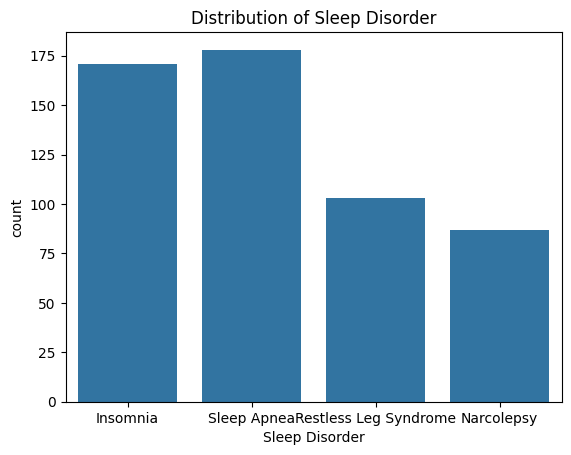

In [11]:
sns.countplot(data=df, x="Sleep Disorder")
plt.title("Distribution of Sleep Disorder")
plt.show()

# Correlation heatmap

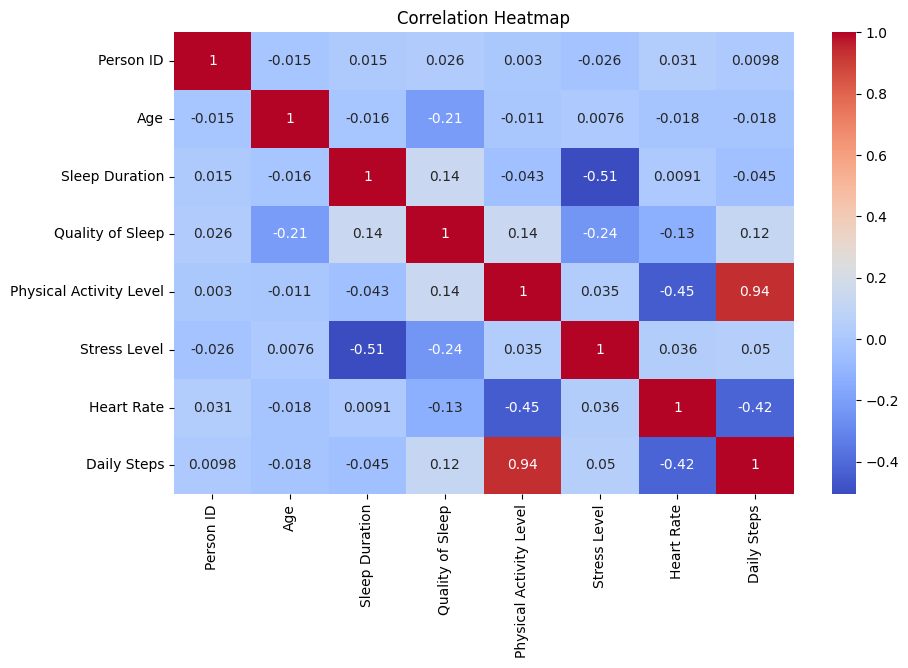

In [12]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Example of relationship between variables

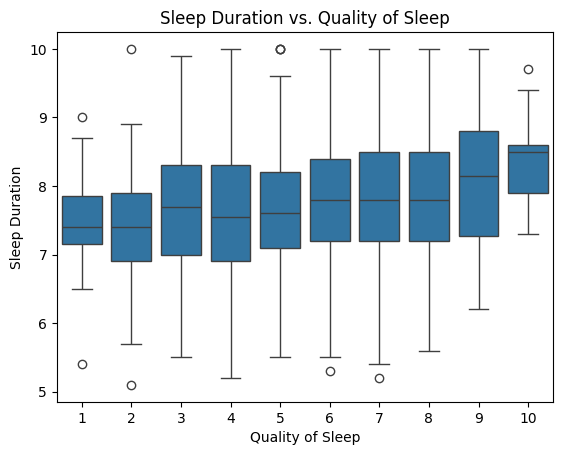

In [13]:
sns.boxplot(data=df, x="Quality of Sleep", y="Sleep Duration")
plt.title("Sleep Duration vs. Quality of Sleep")
plt.show()

# Check outliers

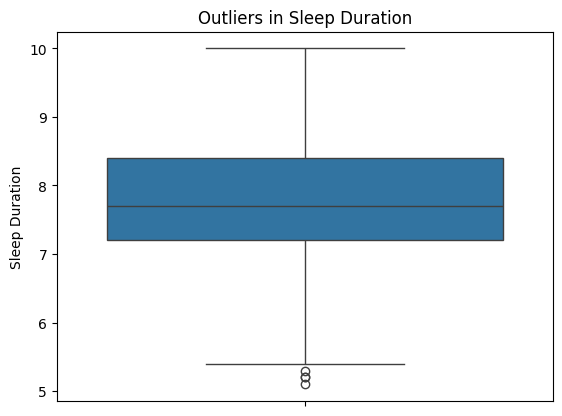

In [14]:
sns.boxplot(data=df, y="Sleep Duration")
plt.title("Outliers in Sleep Duration")
plt.show()

/tmp/ipython-input-3439187421.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Sleep Disorder", y="Sleep Duration", palette="pastel")


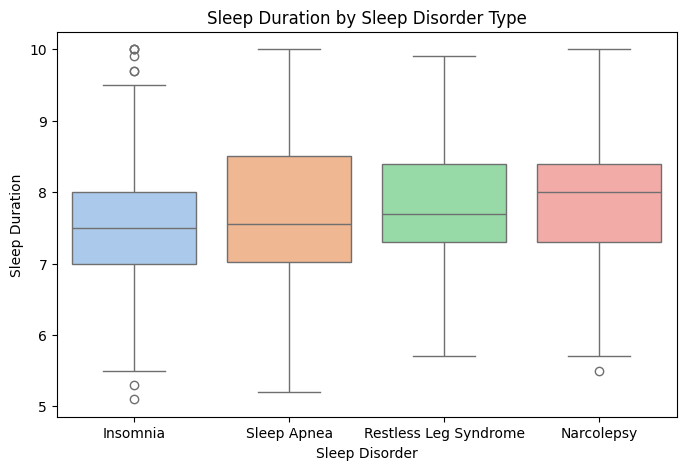

In [15]:
# Sleep Duration by Disorder
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Sleep Disorder", y="Sleep Duration", palette="pastel")
plt.title("Sleep Duration by Sleep Disorder Type")
plt.show()

In [16]:
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")

df = df[df["Age"] > 0]


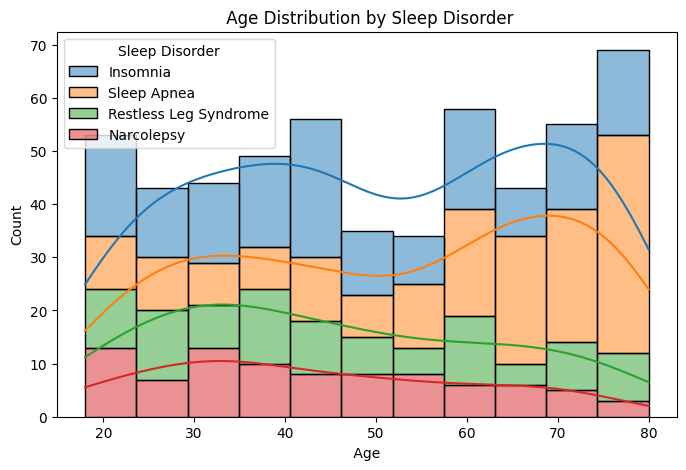

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Age", hue="Sleep Disorder", kde=True, multiple="stack")
plt.title(" Age Distribution by Sleep Disorder")
plt.xlabel(" Age ")
plt.ylabel("Count")
plt.show()


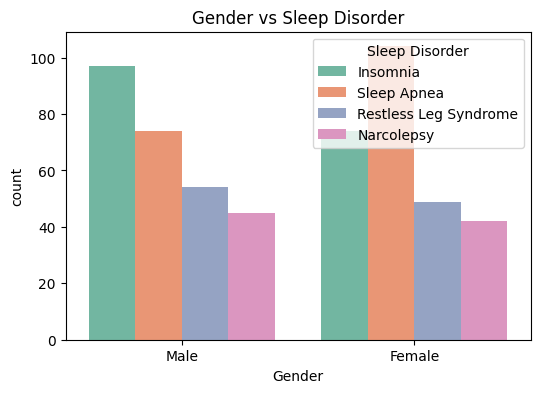

In [18]:
# Gender vs Sleep Disorder
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Gender", hue="Sleep Disorder", palette="Set2")
plt.title("Gender vs Sleep Disorder")
plt.show()

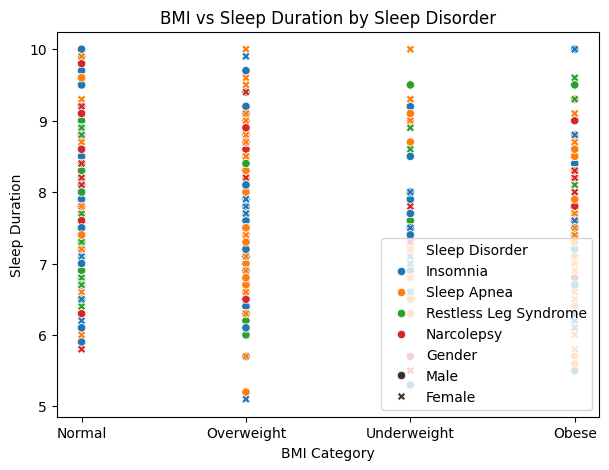

In [19]:
# BMI vs Sleep Duration
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="BMI Category", y="Sleep Duration", hue="Sleep Disorder", style="Gender")
plt.title("BMI vs Sleep Duration by Sleep Disorder")
plt.show()

# **Data Preprocessing**

# Handling Missing Values

In [20]:
# Check missing values
df.isnull().sum()

# Handle missing values
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# For categorical columns → fill with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipython-input-4003378575.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


# Encoding Categorical Variables

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


# Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


# Data Validation & Visualization After Preprocessing

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Person ID,1500.0,0.000000e+00,1.000334,-1.730896,-0.865448,0.000000,0.865448,1.730896
Gender,1500.0,4.826667e-01,0.499866,0.000000,0.000000,0.000000,1.000000,1.000000
Age,1500.0,4.736952e-17,1.000334,-1.674226,-0.847983,-0.076822,0.859587,1.740913
Occupation,1500.0,7.000000e+00,4.321935,0.000000,3.000000,7.000000,11.000000,14.000000
Sleep Duration,1500.0,2.025047e-16,1.000334,-2.944861,-0.612723,-0.057452,0.719927,2.496795
Quality of Sleep,1500.0,1.563194e-16,1.000334,-2.707549,-0.463104,0.098007,0.659119,2.342452
Physical Activity Level,1500.0,5.388282e-17,1.000334,-1.547294,-0.763060,-0.109531,0.628956,3.158111
Stress Level,1500.0,1.586879e-16,1.000334,-2.118236,-0.850337,-0.005072,0.840194,1.685460
BMI Category,1500.0,1.142000e+00,1.034029,0.000000,0.000000,1.000000,2.000000,3.000000
Blood Pressure,1500.0,2.199660e+02,113.346945,0.000000,135.000000,213.000000,304.250000,473.000000


# Correlation heatmap

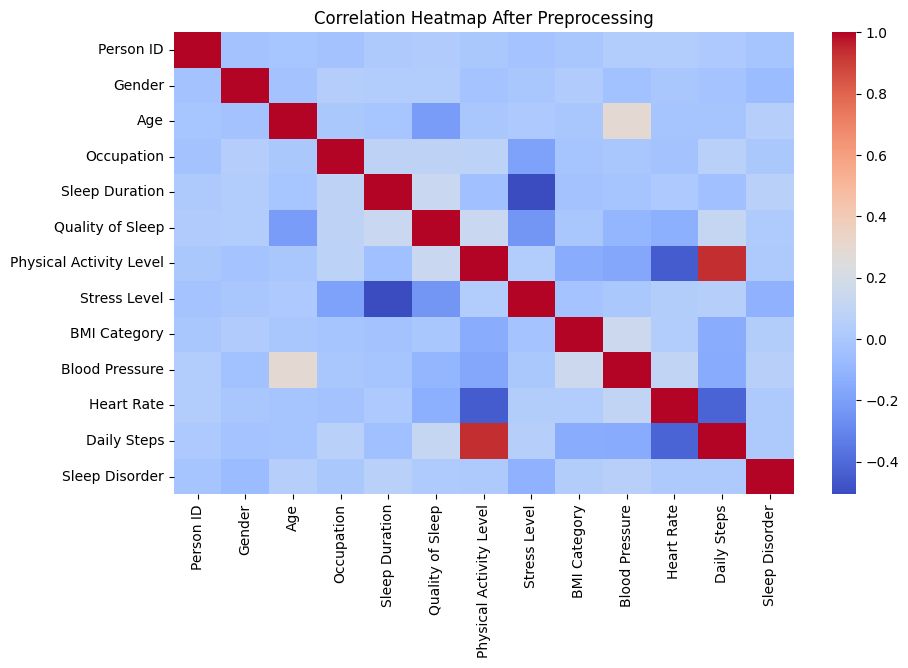

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap After Preprocessing")
plt.show()


# Boxplot after scaling

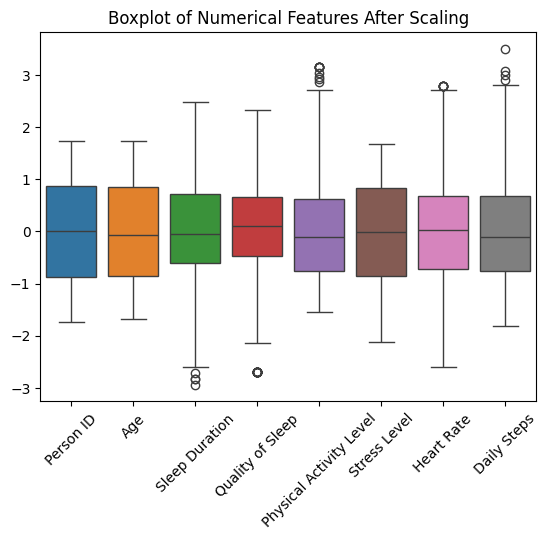

In [25]:
sns.boxplot(data=df[num_cols])
plt.title("Boxplot of Numerical Features After Scaling")
plt.xticks(rotation=45)
plt.show()


# Distribution of target variable

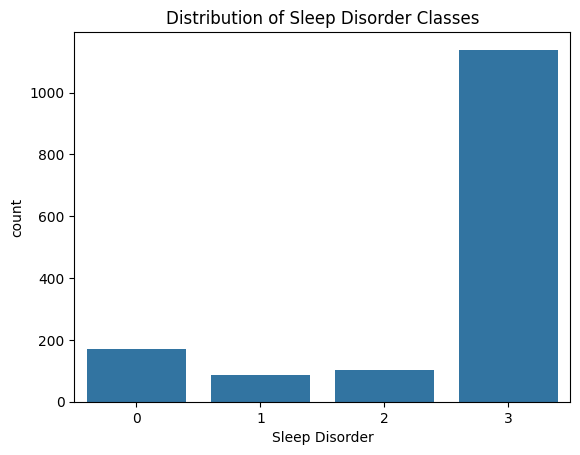

In [26]:
# Check if target (Sleep_Disorder) balanced
sns.countplot(x="Sleep Disorder", data=df)
plt.title("Distribution of Sleep Disorder Classes")
plt.show()

# Check correlation with target



In [27]:
corr_with_target = df.corr()["Sleep Disorder"].sort_values(ascending=False)
print("Correlation with Sleep Disorder:\n", corr_with_target)

Correlation with Sleep Disorder:
 Sleep Disorder             1.000000
Sleep Duration             0.062135
Blood Pressure             0.057932
Age                        0.050790
BMI Category               0.037260
Quality of Sleep           0.021185
Heart Rate                 0.016813
Physical Activity Level    0.016522
Daily Steps                0.013239
Occupation                 0.002410
Person ID                 -0.019022
Gender                    -0.069931
Stress Level              -0.120343
Name: Sleep Disorder, dtype: float64


# Visualize top correlated features

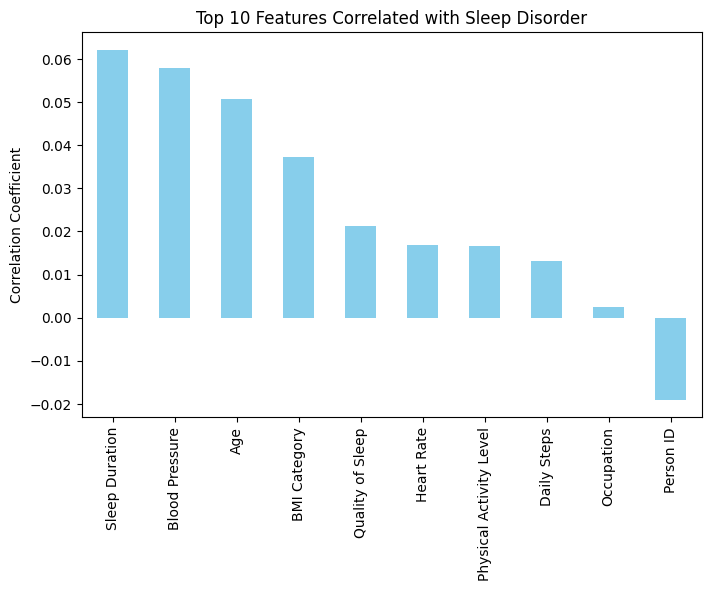

In [28]:
plt.figure(figsize=(8, 5))
corr_with_target.drop("Sleep Disorder").head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 Features Correlated with Sleep Disorder")
plt.ylabel("Correlation Coefficient")
plt.show()

# Separate features (X) and target (y)

In [29]:
X = df.drop("Sleep Disorder", axis=1)
y = df["Sleep Disorder"]

# **Data Splitting & Encoding**

# Encode categorical features

In [30]:
from sklearn.preprocessing import LabelEncoder

# Create a copy to avoid modifying the original dataframe
df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

df_encoded.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,-1.730896,1,-0.407320,7,-0.834831,-0.463104,0.831550,1.685460,0,115,-1.533797,1.189356,3
1,-1.728587,1,-0.352237,11,-1.167994,0.659119,1.668066,-0.427704,2,314,-0.634609,1.609261,3
2,-1.726278,0,-0.186988,3,1.053090,-1.024215,-0.266378,0.417561,0,206,-1.206819,-0.385026,3
3,-1.723968,1,-1.343729,14,0.275711,0.098007,-1.442730,-0.427704,0,466,1.817722,-1.597969,3
4,-1.721659,0,-1.674226,9,1.164144,0.098007,0.178021,-0.850337,2,100,-0.307631,0.161029,3


# Split into features (X) and target (y)

In [31]:
X = df_encoded.drop("Sleep Disorder", axis=1)
y = df_encoded["Sleep Disorder"]

In [32]:
df = df.dropna()


In [33]:
df = pd.get_dummies(df, drop_first=True)


# Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop("Sleep Disorder", axis=1))
X = pd.DataFrame(scaled_features, columns=df.drop("Sleep Disorder", axis=1).columns)
y = df["Sleep Disorder"]


In [35]:
# Balance classes (if dataset is imbalanced)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# **Model Training & Comparison**

# Train/Test Split

In [36]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)

In [38]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=2, gamma='scale', random_state=42)
svm.fit(X_train, y_train)


SVC(C=2, random_state=42)

In [39]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=8, min_samples_split=5, random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=8, min_samples_split=5, random_state=42)

# Model Building (Improved Models)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize models with improved hyperparameters
log_reg = LogisticRegression(max_iter=1000, random_state=42)
dt = DecisionTreeClassifier(max_depth=8, min_samples_split=5, random_state=42)
rf = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)
svm = SVC(kernel='rbf', C=2, gamma='scale', random_state=42)


# Model Training & Evaluation

Logistic Regression Accuracy: 0.40
              precision    recall  f1-score   support

           0       0.44      0.46      0.45       239
           1       0.37      0.47      0.41       208
           2       0.38      0.35      0.36       231
           3       0.40      0.31      0.35       234

    accuracy                           0.40       912
   macro avg       0.40      0.40      0.39       912
weighted avg       0.40      0.40      0.39       912



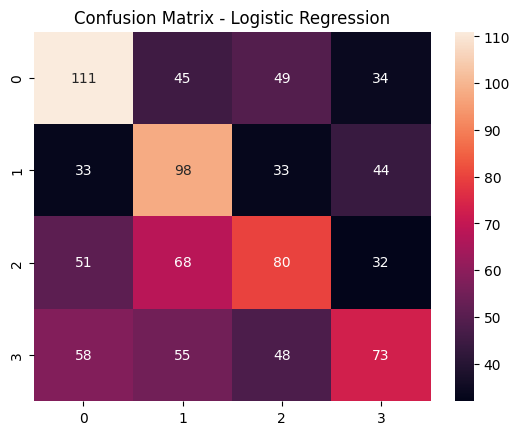

Decision Tree Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.62      0.67      0.64       239
           1       0.71      0.74      0.72       208
           2       0.57      0.76      0.65       231
           3       0.71      0.39      0.51       234

    accuracy                           0.64       912
   macro avg       0.65      0.64      0.63       912
weighted avg       0.65      0.64      0.63       912



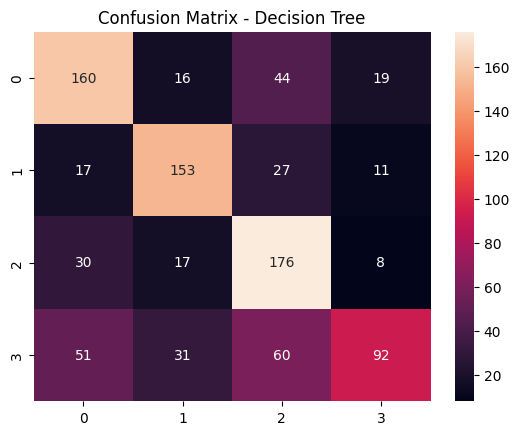

Random Forest Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       239
           1       0.90      0.97      0.93       208
           2       0.88      0.97      0.93       231
           3       0.93      0.75      0.83       234

    accuracy                           0.90       912
   macro avg       0.90      0.90      0.89       912
weighted avg       0.90      0.90      0.89       912



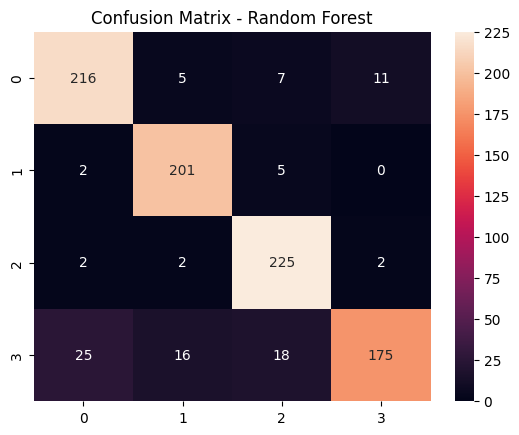

SVM Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       239
           1       0.87      0.99      0.92       208
           2       0.91      0.97      0.94       231
           3       0.93      0.62      0.74       234

    accuracy                           0.88       912
   macro avg       0.88      0.88      0.87       912
weighted avg       0.89      0.88      0.87       912



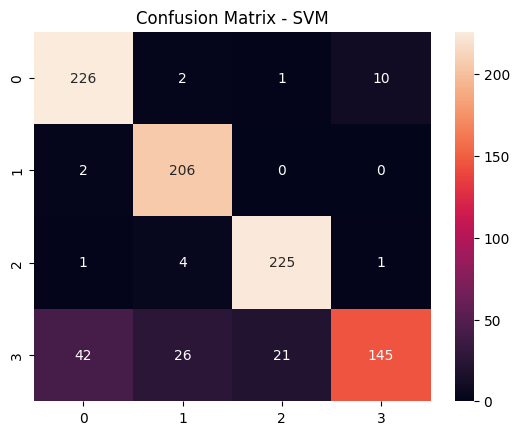

In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

models = {
    "Logistic Regression": log_reg,
    "Decision Tree": dt,
    "Random Forest": rf,
    "SVM": svm
}

results = {}
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# Cross Validation Check

In [42]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X_res, y_res, cv=5)
    print(f"{name} Cross-Validation Mean Accuracy: {scores.mean():.3f}")


Logistic Regression Cross-Validation Mean Accuracy: 0.345
Decision Tree Cross-Validation Mean Accuracy: 0.541
Random Forest Cross-Validation Mean Accuracy: 0.774
SVM Cross-Validation Mean Accuracy: 0.831


# Compare Results

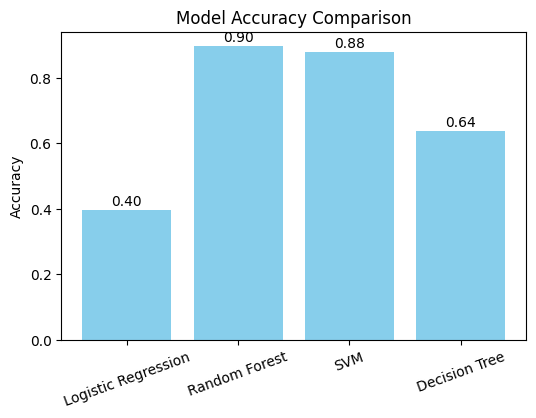

In [45]:
from sklearn.metrics import accuracy_score

results = {
    "Logistic Regression": accuracy_score(y_test, predictions["Logistic Regression"]),
    "Random Forest": accuracy_score(y_test, predictions["Random Forest"]),
    "SVM": accuracy_score(y_test, predictions["SVM"]),
    "Decision Tree": accuracy_score(y_test, predictions["Decision Tree"])
}

plt.figure(figsize=(6,4))
bars = plt.bar(results.keys(), results.values(), color="skyblue")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=20)


for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.005,
        f"{bar.get_height():.2f}",
        ha='center',
        va='bottom'
    )

plt.show()

# **Model Evaluation & Insights**

# Evaluate the best model

In [46]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")

# Predictions
if best_model_name in ["Logistic Regression", "SVM"]:
    # These models were trained on scaled data
    y_pred_best = best_model.predict(X_test_scaled)
else:
    # These models were trained on unscaled data
    y_pred_best = best_model.predict(X_test)


# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

Best Model: Random Forest

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       239
           1       0.90      0.97      0.93       208
           2       0.88      0.97      0.93       231
           3       0.93      0.75      0.83       234

    accuracy                           0.90       912
   macro avg       0.90      0.90      0.89       912
weighted avg       0.90      0.90      0.89       912



# Confusion Matrix Visualization

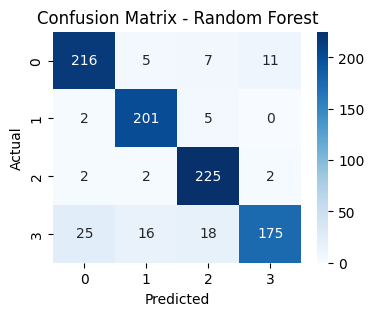

In [47]:
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance

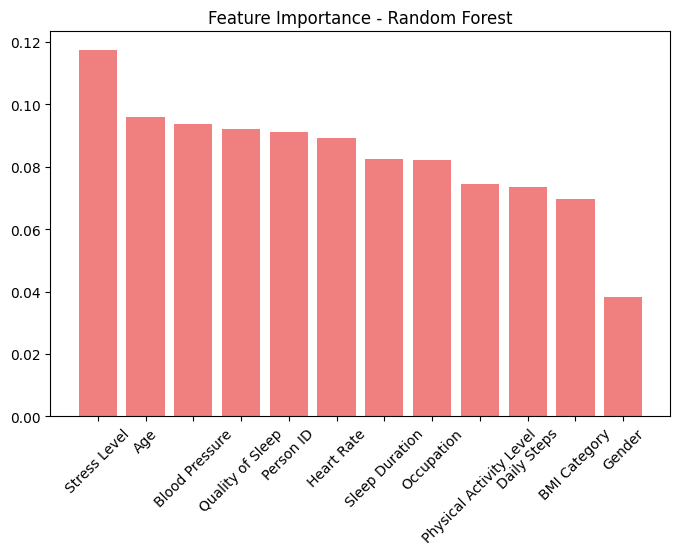

In [48]:
if best_model_name in ["Decision Tree", "Random Forest"]:
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(8,5))
    plt.bar(range(X.shape[1]), importances[indices], align="center", color="lightcoral")
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
    plt.title(f"Feature Importance - {best_model_name}")
    plt.show()


# Final Evaluation Summary

In [49]:
print("Model Performance Summary:")
for name, acc in results.items():
    print(f"{name}: {acc:.3f}")

Model Performance Summary:
Logistic Regression: 0.397
Random Forest: 0.896
SVM: 0.879
Decision Tree: 0.637


**Model Optimization (Hyperparameter Tuning)**

In [50]:
from sklearn.model_selection import GridSearchCV


In [ ]:
# Scale the training and testing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)

# Apply GridSearchCV
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf,
                       cv=5, n_jobs=-1, verbose=1)

grid_rf.fit(X_train_scaled, y_train)
print("Best Parameters for Random Forest:", grid_rf.best_params_)
print("Best Accuracy:", grid_rf.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [ ]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm = SVC(random_state=42)

grid_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm,
                        cv=5, n_jobs=-1, verbose=1)

grid_svm.fit(X_train_scaled, y_train)
print("Best Parameters for SVM:", grid_svm.best_params_)
print("Best Accuracy:", grid_svm.best_score_)


In [ ]:
best_rf = grid_rf.best_estimator_

y_pred_best_rf = best_rf.predict(X_test_scaled)
print("Optimized Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
